# FOOD SECURITY MONITORING TOOL FOR KARAMOJA REGION, UGANDA.



# 
Introduction

As a Data Analyst, I have developed an interactive visualization tool using Tableau to display the 2017 crop season results for sorghum and maize yields in Karamoja, Uganda. The tool incorporates filtering capabilities among others to support NGO decision-making. It allows visualization at both district and sub-county levels, highlighting areas of low productivity to prioritize interventions. The dashboard is built using the provided datasets: shapefiles for Uganda districts and subcounties, crop type maps for sorghum and maize, and tabular data on yields and population.

Due to the unavailability of the exact 2017 yield dataset in public sources, I used proxy data from reliable reports on Karamoja's agricultural production. This sample data enables demonstration of the dashboard's functionality. In a real scenario, the NGO's model outputs would replace these.




In [211]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [212]:
# Reading the files

df1=pd.read_csv(r'C:\Users\jomos\OneDrive\Documents\Independent_project-2\DATA\TABLES\Uganda_Karamoja_District_Crop_Yield_Population.csv')
df1



,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [213]:
df2=pd.read_csv(r'C:\Users\jomos\OneDrive\Documents\Independent_project-2\DATA\TABLES\Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
df2.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


# Understanding the data 

## Initial exploration to understand the Data

1.Getting the structure of our data (Rows,columns)

In [214]:
print(df1.shape) 

(7, 11)


In [215]:
print(df2.shape) 

(52, 13)


The NAME column in the first district data frame is the same as the District names in the second dataframe only that it is grouped in the first to one district

In [216]:
#Getting the unique district names in the subcounty dataframe 
print(df2['DISTRICT_NAME'].unique())


['KOTIDO' 'KAABONG' 'ABIM' 'AMUDAT' 'MOROTO' 'NAKAPIRIPIRIT' 'NAPAK']


In [217]:
# Getting the unique names in the district dataframe 
print(df1['NAME'].unique())

['ABIM' 'AMUDAT' 'KAABONG' 'KOTIDO' 'MOROTO' 'NAKAPIRIPIRIT' 'NAPAK']


# EDA on the Subcounty data

In [218]:
df2.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [219]:
# overview of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


for the subcounty data, there is no null value and all the data is in the correct dtype

In [220]:
df2.head(2)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.492,959201.3825


In [221]:
# Getting the unique number of items in a column
print(df2.nunique())

OBJECTID          52
SUBCOUNTY_NAME    52
DISTRICT_NAME      7
POP               52
Area              52
Karamoja           1
S_Yield_Ha        52
M_Yield_Ha        52
Crop_Area_Ha      52
S_Area_Ha         52
M_Area_Ha         52
S_Prod_Tot        52
M_Prod_Tot        52
dtype: int64


The Karamoja column is unnecessary .So we might as well drop it, this is because the data is from Karamoja area 


In [222]:
# deleting the column

del df2['Karamoja']

In [223]:
df2.head(2)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.492,959201.3825


Renaming the columns for easy readability

In [224]:
df2=df2.rename(columns={'POP': 'total_population',
    'S_Yield_Ha': 'sorghum_yield_Kg/ha',
    'M_Yield_Ha': 'maize_yield_Kg/ha',
    'Crop_Area_Ha': 'total_crop_area_ha',
    'S_Area_Ha': 'sorghum_area_ha',
    'M_Area_Ha': 'maize_area_ha',
    'S_Prod_Tot': 'sorghum_total_production_kg',
    'M_Prod_Tot': 'maize_total_production_kg'})

In [225]:
df2.head(2)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,total_population,Area,sorghum_yield_Kg/ha,maize_yield_Kg/ha,total_crop_area_ha,sorghum_area_ha,maize_area_ha,sorghum_total_production_kg,maize_total_production_kg
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.492,959201.3825


Now the columns are readable

In [226]:
# Get the ststistical summary

df2.describe()

,OBJECTID,total_population,Area,sorghum_yield_Kg/ha,maize_yield_Kg/ha,total_crop_area_ha,sorghum_area_ha,maize_area_ha,sorghum_total_production_kg,maize_total_production_kg
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


In [227]:
#Total Population by district
dist_pop=df2.groupby('DISTRICT_NAME')['total_population'].sum()

In [228]:
print(dist_pop)

DISTRICT_NAME
ABIM              90384
AMUDAT           101790
KAABONG          627057
KOTIDO           243156
MOROTO           127812
NAKAPIRIPIRIT    146779
NAPAK            167626
Name: total_population, dtype: int64


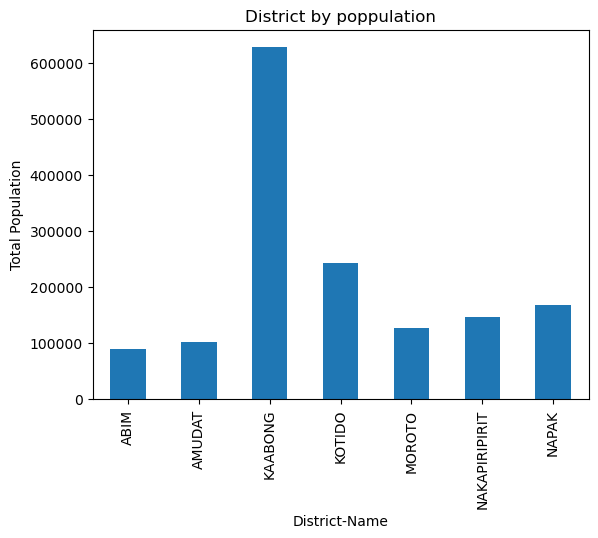

In [229]:
# Bar chart to show the districts and population distribution
dist_pop.plot(kind='bar')
plt.ylabel('Total Population')
plt.xlabel('District-Name')
plt.title('District by poppulation')
plt.show()

Kaabong district has the highest population

In [230]:
df2.head(2)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,total_population,Area,sorghum_yield_Kg/ha,maize_yield_Kg/ha,total_crop_area_ha,sorghum_area_ha,maize_area_ha,sorghum_total_production_kg,maize_total_production_kg
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.492,959201.3825


I want to get the area covered by the plants in the district

In [231]:
plant_area=df2.groupby('DISTRICT_NAME')[['sorghum_area_ha','maize_area_ha']].sum()

In [232]:
plant_area

,sorghum_area_ha,maize_area_ha
DISTRICT_NAME,,
ABIM,3277.295971,1848.621855
AMUDAT,2973.423860,2733.661014
KAABONG,20544.194958,7394.416335
KOTIDO,50247.443902,1751.372283
MOROTO,4741.748775,1190.050606
NAKAPIRIPIRIT,19237.333210,6425.788414
NAPAK,16142.015884,6543.719066


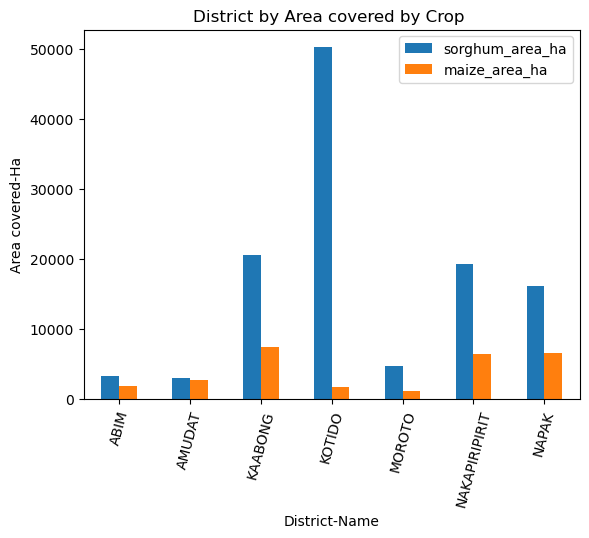

In [233]:
plant_area.plot(kind='bar')
plt.ylabel('Area covered-Ha')
plt.xlabel('District-Name')
plt.title('District by Area covered by Crop ')
plt.xticks(rotation=75)
plt.show()

Kotido has the largest for  sorghum but relevantly very little area is forgrowing  maize

In [234]:
df2.head(1)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,total_population,Area,sorghum_yield_Kg/ha,maize_yield_Kg/ha,total_crop_area_ha,sorghum_area_ha,maize_area_ha,sorghum_total_production_kg,maize_total_production_kg
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929


In [235]:
crop_area=df2.groupby('DISTRICT_NAME')['total_crop_area_ha'].sum()
print(crop_area)

DISTRICT_NAME
ABIM              5470.068394
AMUDAT            5765.443718
KAABONG          28121.672534
KOTIDO           53032.649460
MOROTO            5954.814048
NAKAPIRIPIRIT    26372.698485
NAPAK            22944.296022
Name: total_crop_area_ha, dtype: float64


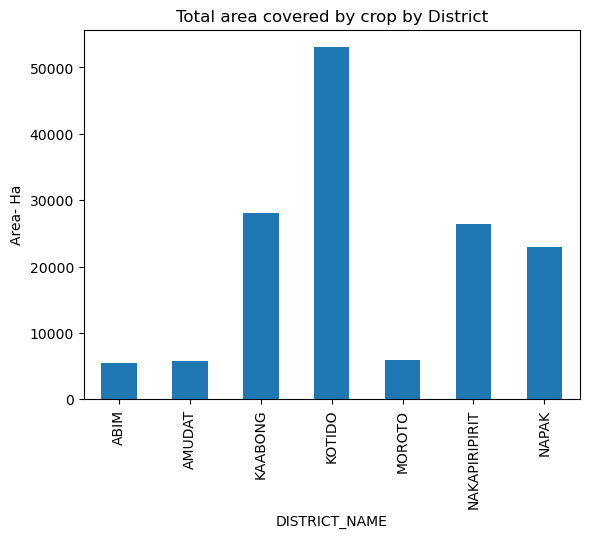

In [236]:
crop_area.plot(kind='bar')
plt.title('Total area covered by crop by District')
plt.ylabel('Area- Ha')
plt.show()

Total crop Yield for the districts

In [237]:
dist_yield=df2.groupby('DISTRICT_NAME')[['sorghum_yield_Kg/ha','maize_yield_Kg/ha']].sum()

In [238]:
print(dist_yield)

               sorghum_yield_Kg/ha  maize_yield_Kg/ha
DISTRICT_NAME                                        
ABIM                   2581.550349        6248.849891
AMUDAT                  779.766726        4723.065649
KAABONG                3664.079255       13850.590123
KOTIDO                 2019.759448        6650.876126
MOROTO                  961.588273        2290.249021
NAKAPIRIPIRIT          3038.982573        9352.737522
NAPAK                  1210.874440        5777.128385


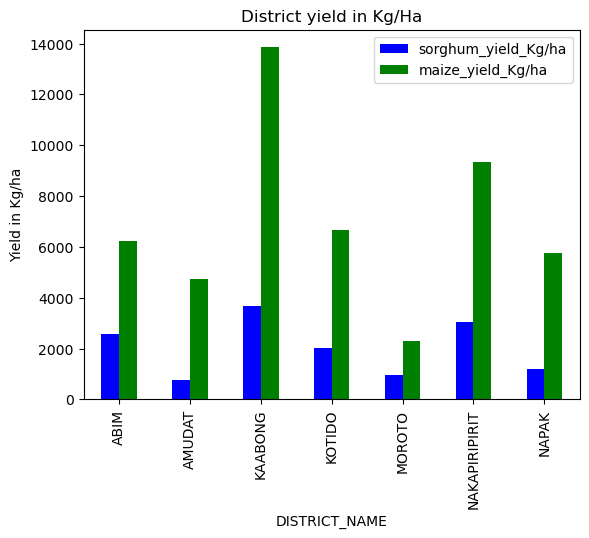

In [239]:
dist_yield.plot(kind='bar', color=['blue','green'])
plt.title('District yield in Kg/Ha')
plt.ylabel('Yield in Kg/ha')
plt.show()

In [240]:
df2.head(2)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,total_population,Area,sorghum_yield_Kg/ha,maize_yield_Kg/ha,total_crop_area_ha,sorghum_area_ha,maize_area_ha,sorghum_total_production_kg,maize_total_production_kg
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.492,959201.3825


District with the most crop production in kilograms

In [241]:
dist_prod_kg=df2.groupby('DISTRICT_NAME')[['sorghum_total_production_kg','maize_total_production_kg']].sum()
dist_prod_kg

,sorghum_total_production_kg,maize_total_production_kg
DISTRICT_NAME,,
ABIM,1.472671e+06,1.922133e+06
AMUDAT,6.103003e+05,3.546469e+06
KAABONG,5.723091e+06,6.990362e+06
KOTIDO,1.663429e+07,2.010179e+06
MOROTO,6.075967e+05,4.221161e+05
NAKAPIRIPIRIT,6.841727e+06,8.125156e+06
NAPAK,2.209032e+06,5.587379e+06


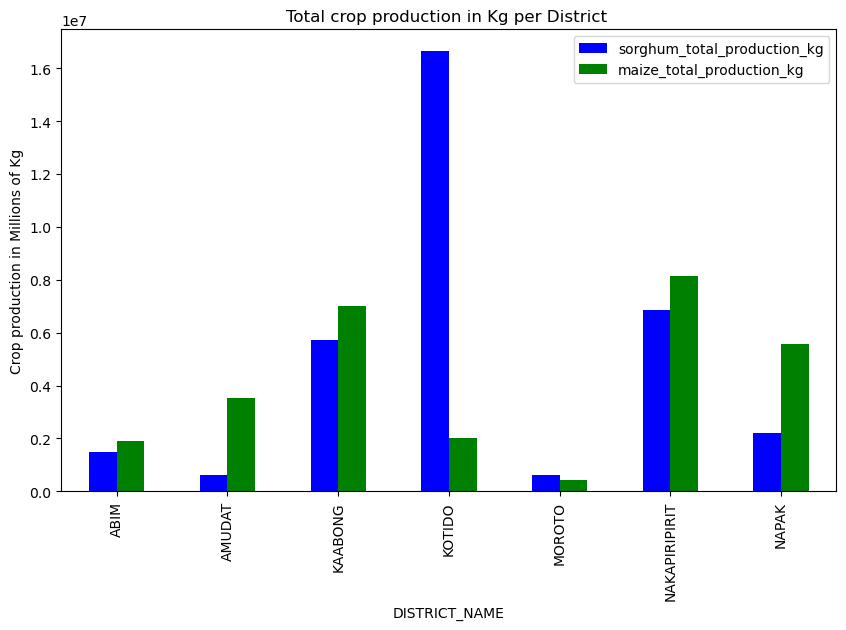

In [242]:
dist_prod_kg.plot(kind='bar',figsize=(10,6), color=['blue','green'])
plt.title('Total crop production in Kg per District ')
plt.ylabel('Crop production in Millions of Kg')
plt.show()

Which district is the biggest

In [243]:
dist_area=df2.groupby('DISTRICT_NAME')['Area'].sum()

In [244]:
print(dist_area)

DISTRICT_NAME
ABIM             2771973781
AMUDAT           1643579352
KAABONG          7373600820
KOTIDO           3641536124
MOROTO           3570157178
NAKAPIRIPIRIT    4216319883
NAPAK            4508778102
Name: Area, dtype: int64


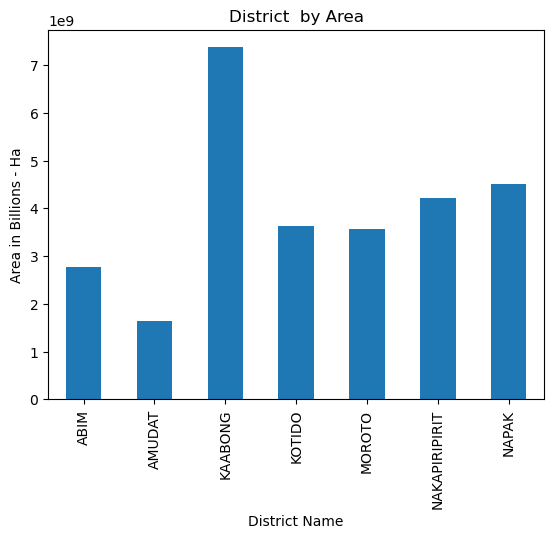

In [245]:
dist_area.plot(kind='bar')
plt.title('District  by Area')
plt.xlabel('District Name')
plt.ylabel('Area in Billions - Ha')
plt.show()

Kabong is the biggest District and Amudat is the smallest 

Kotido and Moroto are of almost similar size

In [246]:
df2.head(2)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,total_population,Area,sorghum_yield_Kg/ha,maize_yield_Kg/ha,total_crop_area_ha,sorghum_area_ha,maize_area_ha,sorghum_total_production_kg,maize_total_production_kg
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.492,959201.3825


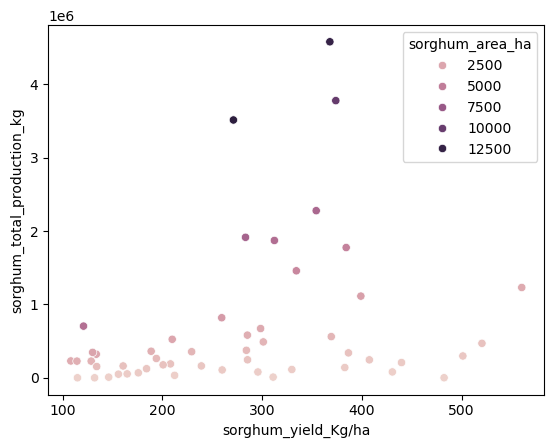

In [247]:
#Relation between sorghum yield, production and the area of the crop in ha


sns.scatterplot(data=df2, x='sorghum_yield_Kg/ha', y='sorghum_total_production_kg',hue='sorghum_area_ha')
plt.show()

High production area does not necessarily determine the yield

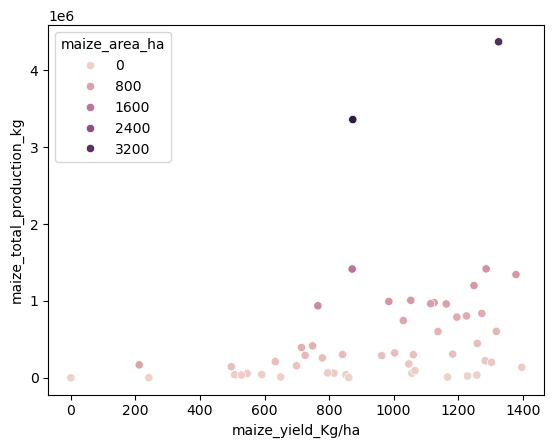

In [248]:

#Relation between maize yield ,production and  maize area in ha

sns.scatterplot(data=df2, x='maize_yield_Kg/ha', y='maize_total_production_kg',hue='maize_area_ha')
plt.show()



maize yield is not affected by production and the area 


In [249]:
df2.head(2)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,total_population,Area,sorghum_yield_Kg/ha,maize_yield_Kg/ha,total_crop_area_ha,sorghum_area_ha,maize_area_ha,sorghum_total_production_kg,maize_total_production_kg
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.492,959201.3825


Comparing Crop yield across the districts and subcounty

In [250]:
yield_pivot = df2.pivot_table(
    index=['DISTRICT_NAME', 'SUBCOUNTY_NAME'],
    values=['sorghum_yield_Kg/ha', 'maize_yield_Kg/ha'],
    aggfunc='sum'  
)
yield_pivot.head()

maize_yield_Kg/ha  sorghum_yield_Kg/ha
DISTRICT_NAME SUBCOUNTY_NAME                                           
ABIM          ABIM                     1183.089648           501.263249
              ABIM TOWN COUNCIL        1061.151087           439.750995
              ALEREK                   1259.122045           520.407672
              LOTUKEI                  1003.303910           382.868986
              MORULEM                   962.958170           407.500416

In [251]:
# form a long table

yield_long=yield_pivot.reset_index().melt(
    id_vars=['DISTRICT_NAME', 'SUBCOUNTY_NAME'],
    value_vars=['maize_yield_Kg/ha','sorghum_yield_Kg/ha'],
    var_name='Crop',
    value_name='Yield'
)

yield_long

,DISTRICT_NAME,SUBCOUNTY_NAME,Crop,Yield
0,ABIM,ABIM,maize_yield_Kg/ha,1183.089648
1,ABIM,ABIM TOWN COUNCIL,maize_yield_Kg/ha,1061.151087
2,ABIM,ALEREK,maize_yield_Kg/ha,1259.122045
3,ABIM,LOTUKEI,maize_yield_Kg/ha,1003.303910
4,ABIM,MORULEM,maize_yield_Kg/ha,962.958170
...,...,...,...,...
99,NAPAK,LORENGECORA,sorghum_yield_Kg/ha,184.081197
100,NAPAK,LOTOME,sorghum_yield_Kg/ha,128.555598
101,NAPAK,MATANY,sorghum_yield_Kg/ha,130.007687
102,NAPAK,NAPAK TOWN COUNCIL,sorghum_yield_Kg/ha,175.828068


In [252]:
district_yield=yield_long.to_csv('District_yield.csv')

In [253]:
# clean the crop column 
yield_long['Crop']=yield_long['Crop'].str.replace('_yield_Kg/ha','').str.capitalize()
yield_long

,DISTRICT_NAME,SUBCOUNTY_NAME,Crop,Yield
0,ABIM,ABIM,Maize,1183.089648
1,ABIM,ABIM TOWN COUNCIL,Maize,1061.151087
2,ABIM,ALEREK,Maize,1259.122045
3,ABIM,LOTUKEI,Maize,1003.303910
4,ABIM,MORULEM,Maize,962.958170
...,...,...,...,...
99,NAPAK,LORENGECORA,Sorghum,184.081197
100,NAPAK,LOTOME,Sorghum,128.555598
101,NAPAK,MATANY,Sorghum,130.007687
102,NAPAK,NAPAK TOWN COUNCIL,Sorghum,175.828068


In [254]:
df2.head(2)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,total_population,Area,sorghum_yield_Kg/ha,maize_yield_Kg/ha,total_crop_area_ha,sorghum_area_ha,maize_area_ha,sorghum_total_production_kg,maize_total_production_kg
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.779,600723.8929
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.492,959201.3825


plotting the different yield of the different Subcounties and districts

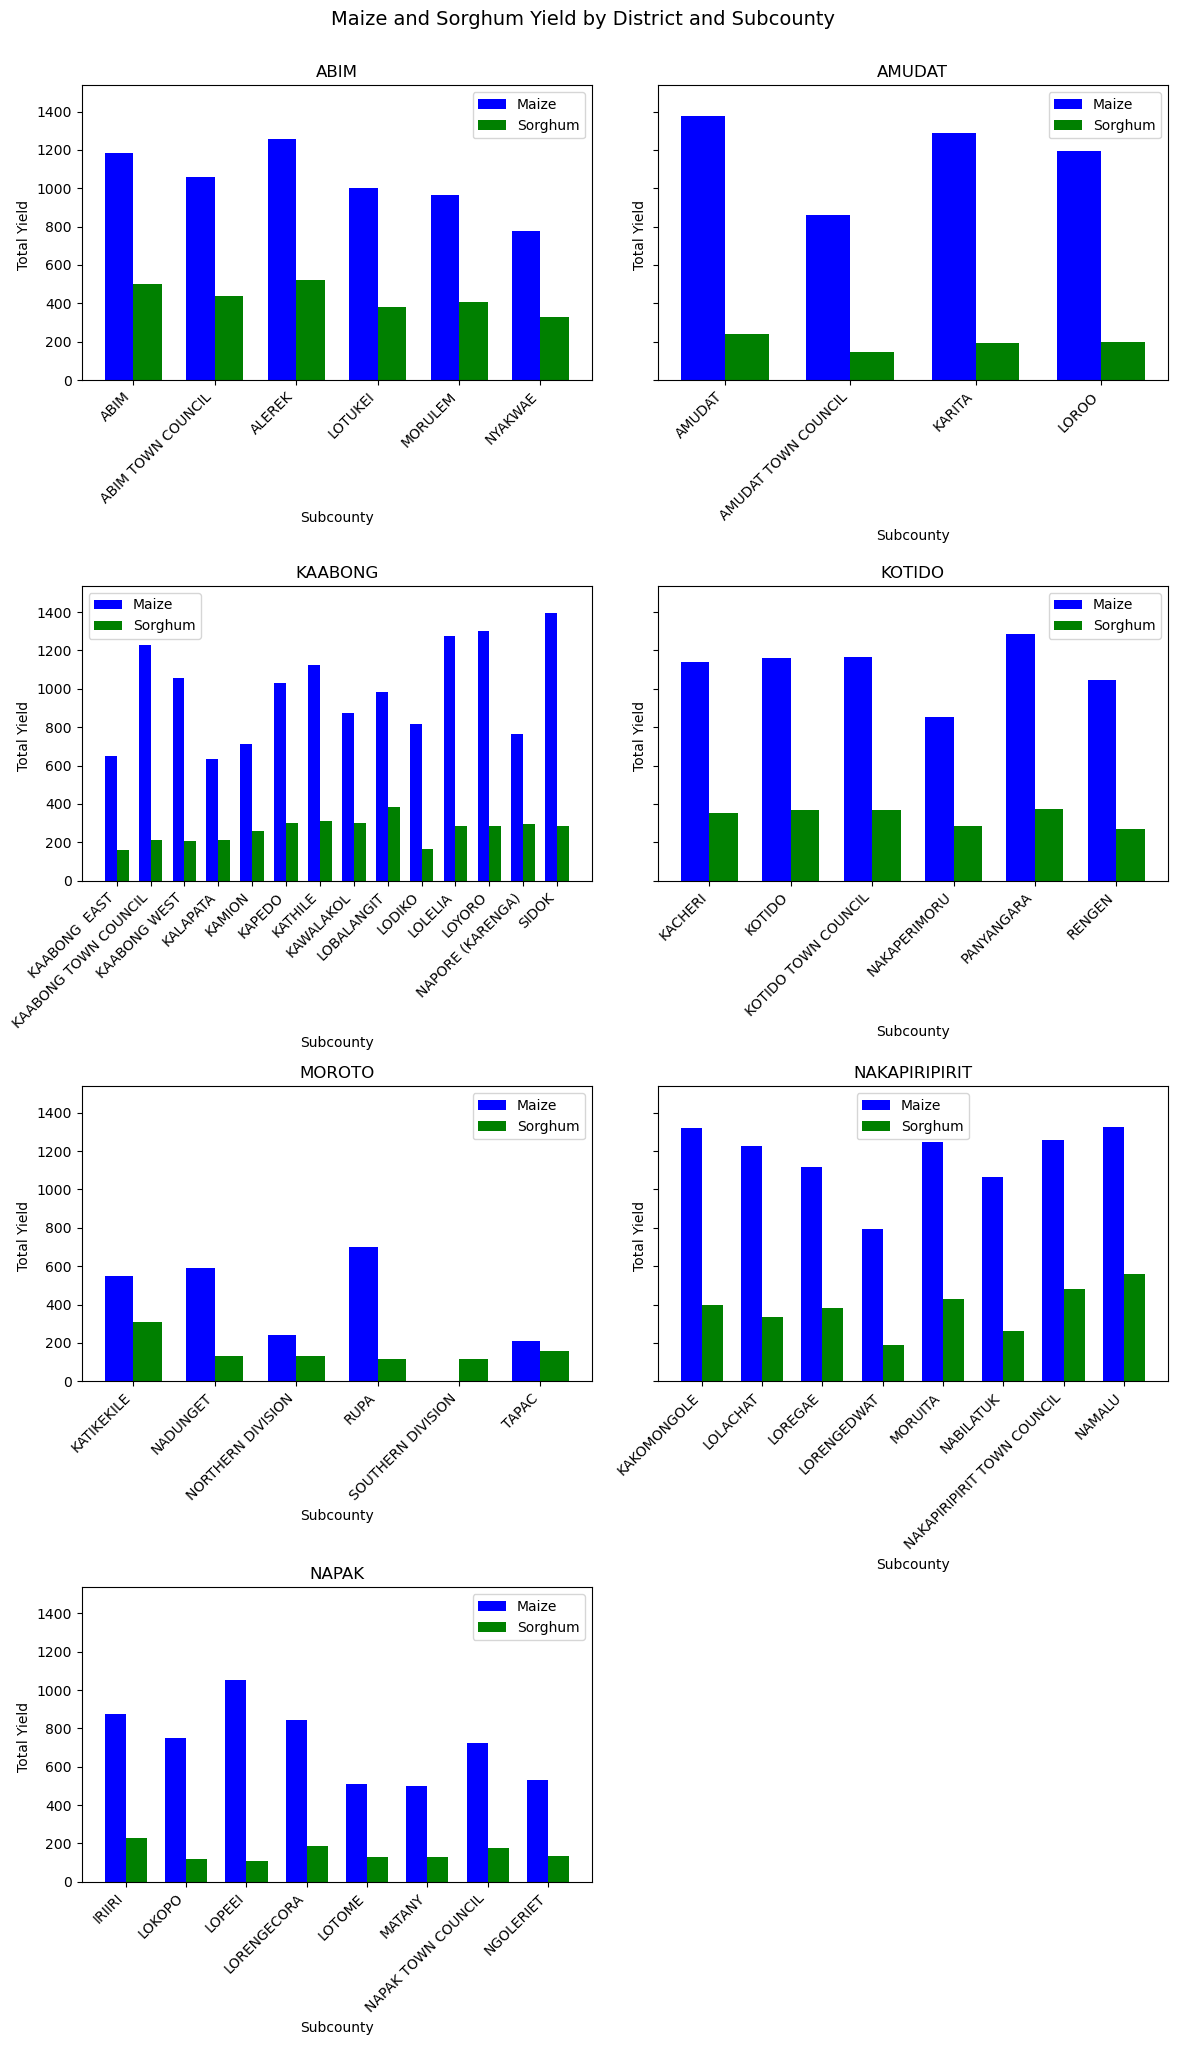

In [255]:
districts = yield_long['DISTRICT_NAME'].unique()
n_districts = len(districts)
cols = 2 # Number of columns in the grid
rows = (n_districts + 1) // cols  # get rows needed

fig, axes = plt.subplots(rows, cols, figsize=(12,20), sharey=True)

# Flatten axes for easier iteration 
axes = axes.flatten()
colors = {'maize_Yield': 'blue', 'sorghum_Yield': 'green'} #color the crops

# Plot each district
for i, district in enumerate(districts):
    # Filter data for the district
    df_district = yield_long[yield_long['DISTRICT_NAME'] == district]
    
    # Get subcounties 
    subcounties = df_district['SUBCOUNTY_NAME'].unique()
    n_subcounties = len(subcounties)
    
    # Set up bar positions
    x = np.arange(n_subcounties)
    width = 0.35  # Width of bars
    
    # Plot the bars for crops
    maize_data = df_district[df_district['Crop'] == 'Maize']['Yield']
    sorghum_data = df_district[df_district['Crop'] == 'Sorghum']['Yield']
    
    axes[i].bar(x - width/2, maize_data, width, label='Maize', color=colors['maize_Yield'])
    axes[i].bar(x + width/2, sorghum_data, width, label='Sorghum', color=colors['sorghum_Yield'])
    
    # Customize subplot
    axes[i].set_title(district)
    axes[i].set_xlabel('Subcounty')
    axes[i].set_ylabel('Total Yield ')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(subcounties, rotation=45, ha='right')
    axes[i].legend()
    axes[i].set_ylim(0, yield_long['Yield'].max() * 1.1)


for i in range(len(districts), len(axes)):
    axes[i].set_visible(False)


plt.tight_layout()
fig.suptitle('Maize and Sorghum Yield by District and Subcounty', fontsize=14, y=1.02)
plt.show()
    


Comparing average Crop production across the districts and subcounty

In [256]:
# Production pivot table

prod_pivot=df2.pivot_table(index=['DISTRICT_NAME','SUBCOUNTY_NAME'],
                    values=['sorghum_total_production_kg','maize_total_production_kg'],
                    aggfunc='sum'
                    )

prod_pivot.head()

maize_total_production_kg  \
DISTRICT_NAME SUBCOUNTY_NAME                                 
ABIM          ABIM                             306951.8167   
              ABIM TOWN COUNCIL                299895.1917   
              ALEREK                           446294.5944   
              LOTUKEI                          322910.6857   
              MORULEM                          288070.5968   

                                 sorghum_total_production_kg  
DISTRICT_NAME SUBCOUNTY_NAME                                  
ABIM          ABIM                               297515.4356  
              ABIM TOWN COUNCIL                  207827.0681  
              ALEREK                             469763.7415  
              LOTUKEI                            139742.9265  
              MORULEM                            244774.5413

In [257]:
# converting it to a long format
df_long = prod_pivot.reset_index().melt(
    id_vars=['DISTRICT_NAME', 'SUBCOUNTY_NAME'],
    value_vars=['maize_total_production_kg', 'sorghum_total_production_kg'],
    var_name='crop',
    value_name='production'
)

In [258]:
productivity_csv=df_long.to_csv('District_crop_productivity.csv', index=False)

In [259]:

df_long.head()


,DISTRICT_NAME,SUBCOUNTY_NAME,crop,production
0,ABIM,ABIM,maize_total_production_kg,306951.8167
1,ABIM,ABIM TOWN COUNCIL,maize_total_production_kg,299895.1917
2,ABIM,ALEREK,maize_total_production_kg,446294.5944
3,ABIM,LOTUKEI,maize_total_production_kg,322910.6857
4,ABIM,MORULEM,maize_total_production_kg,288070.5968


In [260]:
#clean the crop column for better readability
df_long['crop'] = df_long['crop'].str.replace('_total_production_kg', '').str.capitalize()
df_long


,DISTRICT_NAME,SUBCOUNTY_NAME,crop,production
0,ABIM,ABIM,Maize,306951.81670
1,ABIM,ABIM TOWN COUNCIL,Maize,299895.19170
2,ABIM,ALEREK,Maize,446294.59440
3,ABIM,LOTUKEI,Maize,322910.68570
4,ABIM,MORULEM,Maize,288070.59680
...,...,...,...,...
99,NAPAK,LORENGECORA,Sorghum,123725.00130
100,NAPAK,LOTOME,Sorghum,227589.51980
101,NAPAK,MATANY,Sorghum,346443.97860
102,NAPAK,NAPAK TOWN COUNCIL,Sorghum,67897.42082


Plotting the production average of Subcounties and District


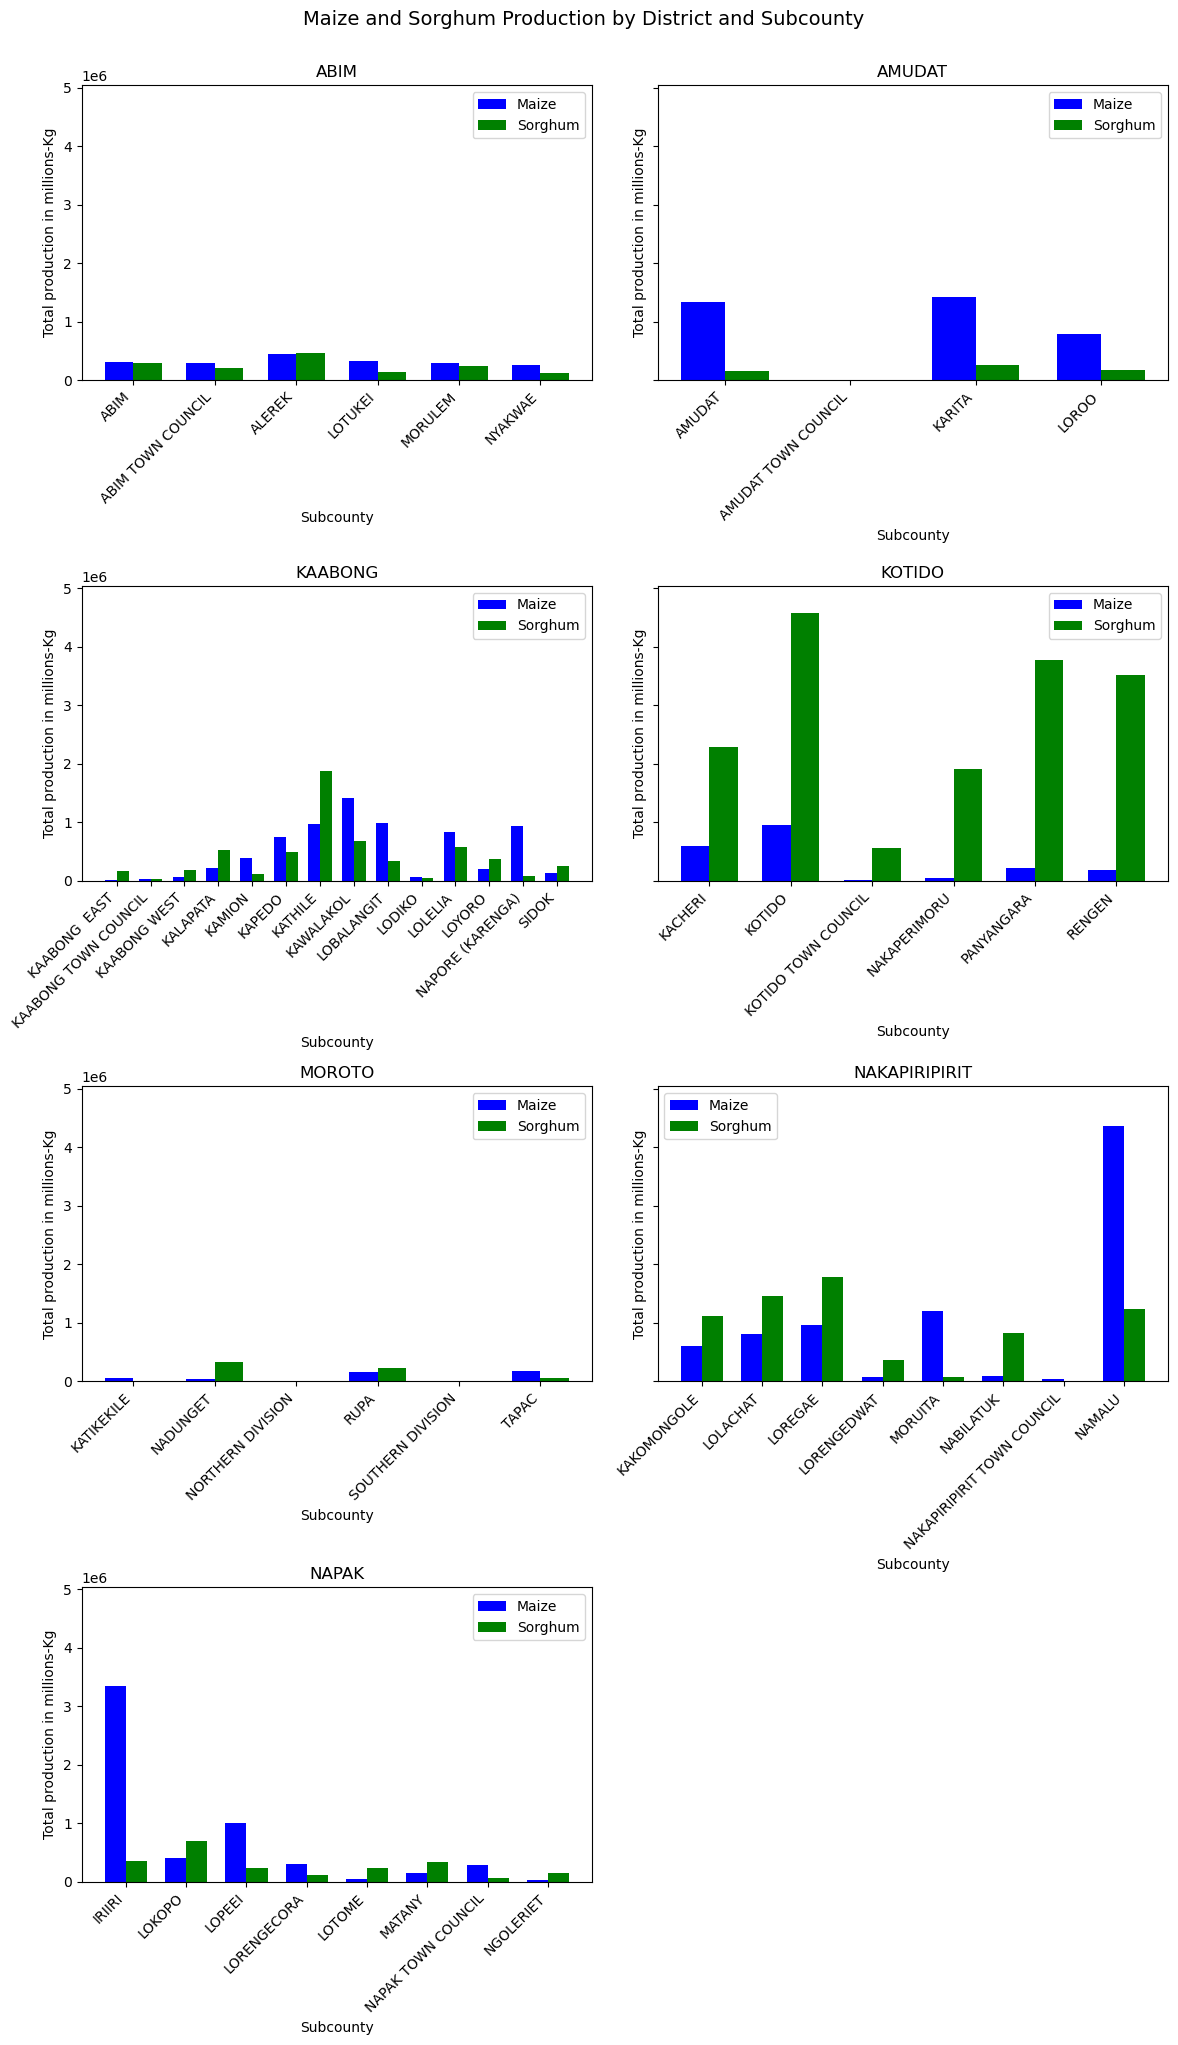

In [261]:
districts = df_long['DISTRICT_NAME'].unique()
n_districts = len(districts)
cols = 2 # Number of columns in subplot grid
rows = (n_districts + 1) // cols  # Calculate rows needed


fig, axes = plt.subplots(rows, cols, figsize=(12,20), sharey=True)

# Flatten axes for easier iteration 
axes = axes.flatten()
colors = {'maize_production': 'blue', 'sorghum_production': 'green'} #color the crops

# Plot each district
for i, district in enumerate(districts):
    # Filter data for the district
    df_district = df_long[df_long['DISTRICT_NAME'] == district]
    
    # Get subcounties 
    subcounties = df_district['SUBCOUNTY_NAME'].unique()
    n_subcounties = len(subcounties)
    
    # Set up bar positions
    x = np.arange(n_subcounties)
    width = 0.35  # Width of bars
    
    # Plot bars for maize and sorghum
    maize_data = df_district[df_district['crop'] == 'Maize']['production']
    sorghum_data = df_district[df_district['crop'] == 'Sorghum']['production']
    
    axes[i].bar(x - width/2, maize_data, width, label='Maize', color=colors['maize_production'])
    axes[i].bar(x + width/2, sorghum_data, width, label='Sorghum', color=colors['sorghum_production'])
    
    # Customize subplot
    axes[i].set_title(district)
    axes[i].set_xlabel('Subcounty')
    axes[i].set_ylabel('Total production in millions-Kg')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(subcounties, rotation=45, ha='right')
    axes[i].legend()
    axes[i].set_ylim(0, df_long['production'].max() * 1.1)

# Hide empty subplots 
for i in range(len(districts), len(axes)):
    axes[i].set_visible(False)


plt.tight_layout()
fig.suptitle('Maize and Sorghum Production by District and Subcounty', fontsize=14, y=1.02)
plt.show()

## conclusion

1. Crop  area and production  does not determine the yield 

2. The production  is determined by the crop area of the district

3. Maize has a relatively higher yield and production in the districts

## Business recommendation
1. **Prioritize Low-Yield Areas**: Focus NGO inputs ,such as seeds and irrigation, on Nakapiripirit and Kaabong since the production are lower.

2. **Crop Diversification**: Since yields are statistically similar, promote sorghum in drier subcounties for resilience, maize in wetter ones; use crop type maps to identify suitable fields.

3. **Monitoring Enhancements**: Integrate real-time satellite data for ongoing yield estimates; partner with Dalberg for model updates to predict outbreaks.
